Практика(первые 4 номера, параметры уменьшены, потому что долго работает очень)

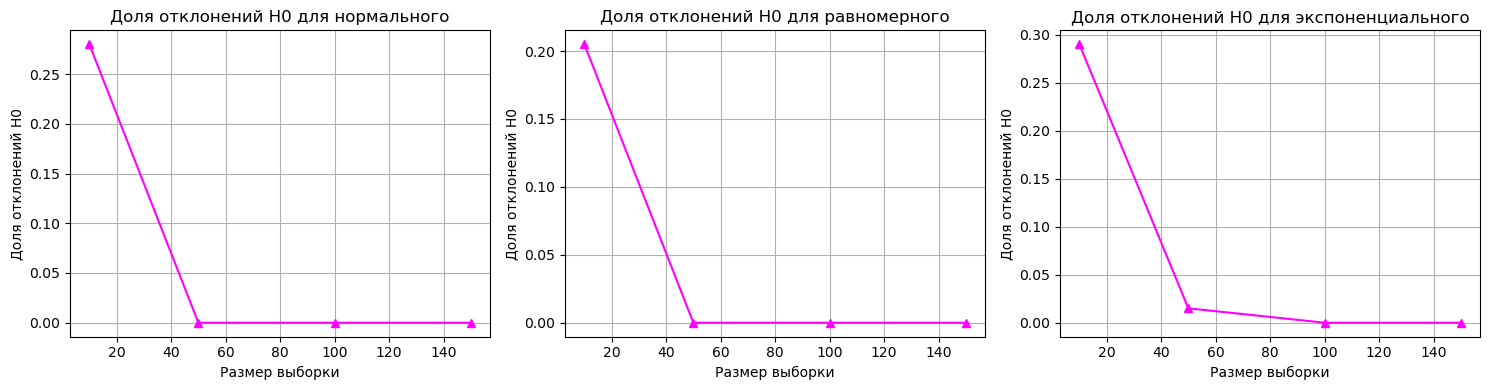

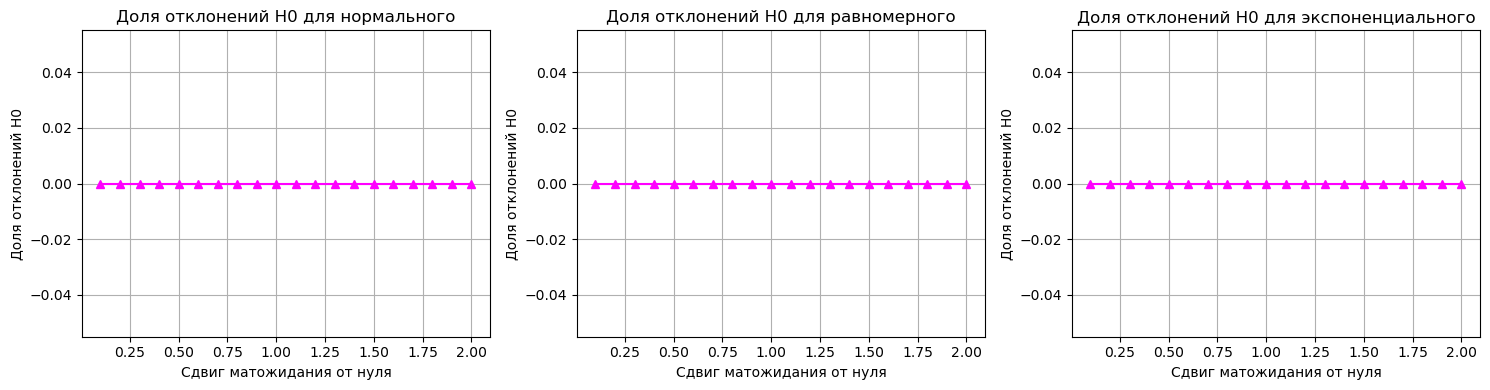

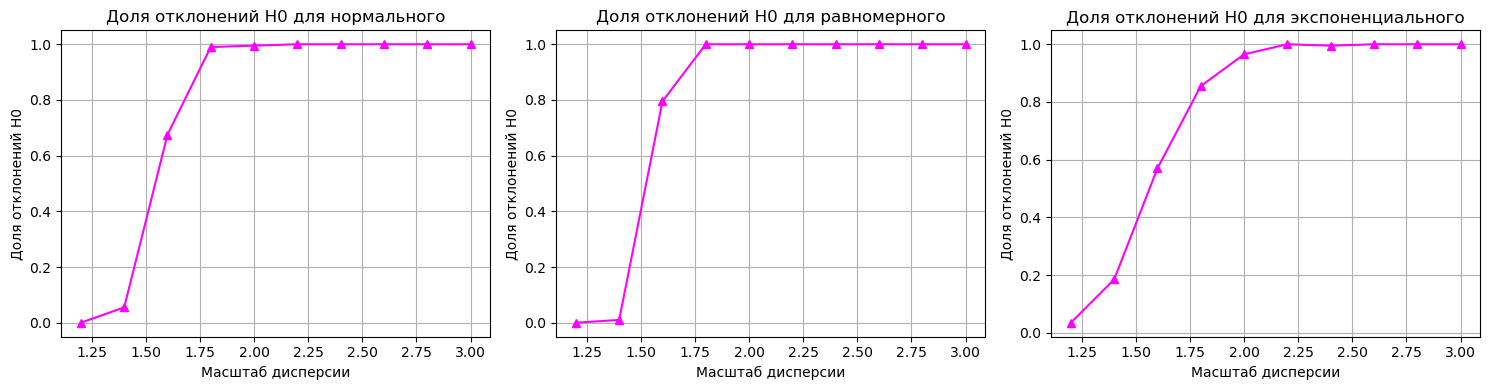

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, t
from statsmodels.stats.proportion import proportion_confint


def check_quantile(x: np.ndarray, bounds: tuple) -> int:
    l, r = bounds
    n = len(x)
    count_outside_bounds = ((x < l) | (x > r)).sum()
    p_min, _ = proportion_confint(count_outside_bounds, n, alpha=0.05)
    return int(p_min > 0.95)


def check_variance(x: np.ndarray) -> int:
    s = np.std(x)
    n = len(x)
    r = s**2 * (n - 1) / chi2.ppf(0.05, n - 1)
    return int(r > 3)


def check_mean(x: np.ndarray) -> int:
    n = len(x)
    s = np.std(x)
    mean_upper = np.mean(x) + s / np.sqrt(n) * t(df=n - 1).ppf(q=0.95)
    return int(mean_upper >= 5)


def plot_rejection_rates(sample_sizes: list, rates: list, distribution_names: list, title: str, xlabel: str):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    for i, ax in enumerate(axs):
        ax.plot(sample_sizes, rates[i], color='fuchsia', marker='^')
        ax.set_title(f'{title} для {distribution_names[i]}')
        ax.set_xlabel(xlabel)
        ax.set_ylabel('Доля отклонений H0')
        ax.grid()
    plt.tight_layout()
    plt.show()


def alpha_wrt_sample_size(shift: float, checker_function):
    rates = [[], [], []]
    sample_sizes = [10, 50, 100, 150]  # Уменьшен список размеров
    distributions = ['нормального', 'равномерного', 'экспоненциального']

    for n in sample_sizes:
        cur_rates = [0, 0, 0]
        for _ in range(200):  # Уменьшено количество итераций
            z = np.random.normal(0, 1, n) + shift
            x = np.random.uniform(-np.sqrt(3), np.sqrt(3), n) + shift
            c = np.random.exponential(1, n) + shift - 1
            cur_rates[0] += checker_function(z)
            cur_rates[1] += checker_function(x)
            cur_rates[2] += checker_function(c)
        for i in range(3):
            rates[i].append(cur_rates[i] / 200)

    plot_rejection_rates(sample_sizes, rates, distributions, 'Доля отклонений H0', 'Размер выборки')


def alpha_wrt_shifted_mean(size: int, checker_function):
    rates = [[], [], []]
    deltas = [0.1 * i for i in range(1, 21)]  # Уменьшено количество сдвигов
    distributions = ['нормального', 'равномерного', 'экспоненциального']

    for shift in deltas:
        cur_rates = [0, 0, 0]
        for _ in range(200):  # Уменьшено количество итераций
            z = np.random.normal(0, 1, size) + shift
            x = np.random.uniform(-np.sqrt(3), np.sqrt(3), size) + shift
            c = np.random.exponential(1, size) + shift - 1
            cur_rates[0] += checker_function(z)
            cur_rates[1] += checker_function(x)
            cur_rates[2] += checker_function(c)
        for i in range(3):
            rates[i].append(cur_rates[i] / 200)

    plot_rejection_rates(deltas, rates, distributions, 'Доля отклонений H0', 'Сдвиг матожидания от нуля')


def alpha_wrt_scaled_variance(size: int, checker_function):
    rates = [[], [], []]
    scales = [1 + 0.2 * i for i in range(1, 11)]  # Уменьшено количество масштабов
    distributions = ['нормального', 'равномерного', 'экспоненциального']

    for scale in scales:
        cur_rates = [0, 0, 0]
        for _ in range(200):  # Уменьшено количество итераций
            z = np.random.normal(0, 1, size) * scale
            x = np.random.uniform(-np.sqrt(3), np.sqrt(3), size) * scale
            c = np.random.exponential(1, size) * scale - 1
            cur_rates[0] += checker_function(z)
            cur_rates[1] += checker_function(x)
            cur_rates[2] += checker_function(c)
        for i in range(3):
            rates[i].append(cur_rates[i] / 200)

    plot_rejection_rates(scales, rates, distributions, 'Доля отклонений H0', 'Масштаб дисперсии')


# Пример запуска
alpha_wrt_sample_size(0, check_variance)
alpha_wrt_shifted_mean(100, check_mean)
alpha_wrt_scaled_variance(100, check_variance)


Домашнее задание(№6)

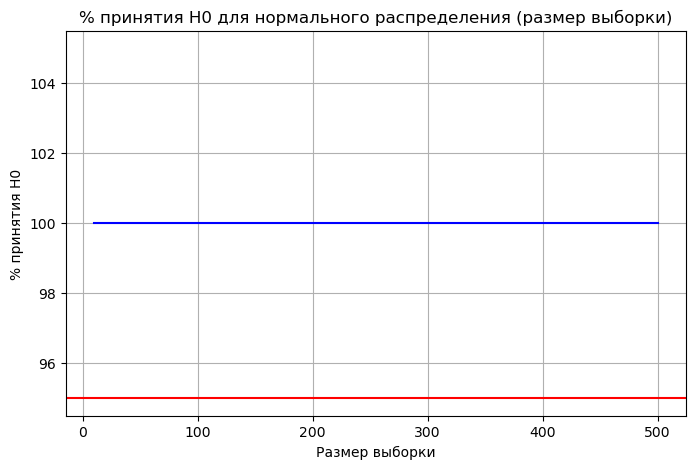

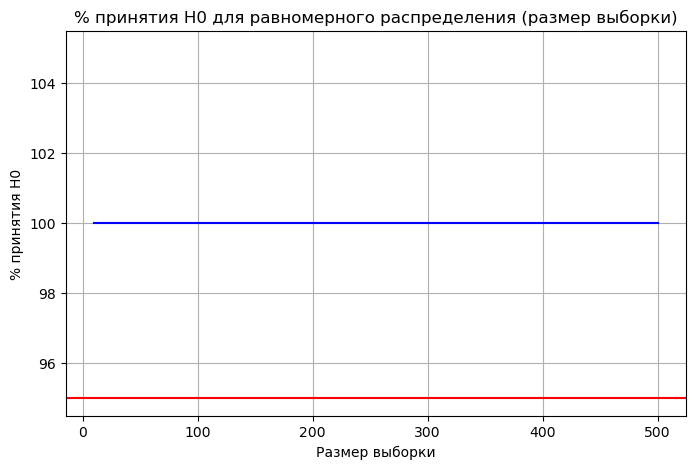

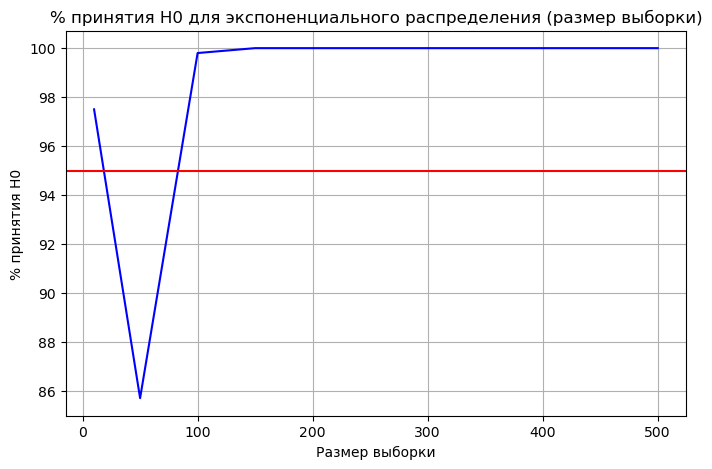

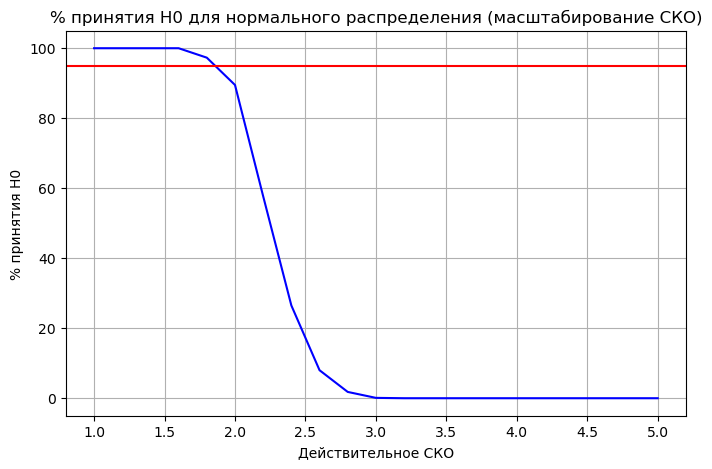

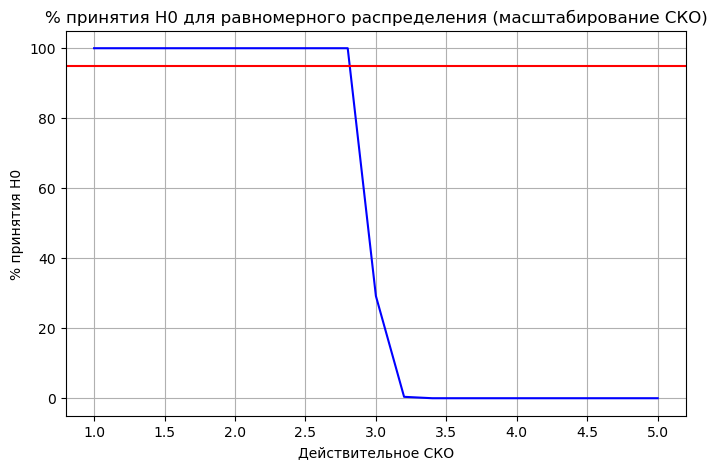

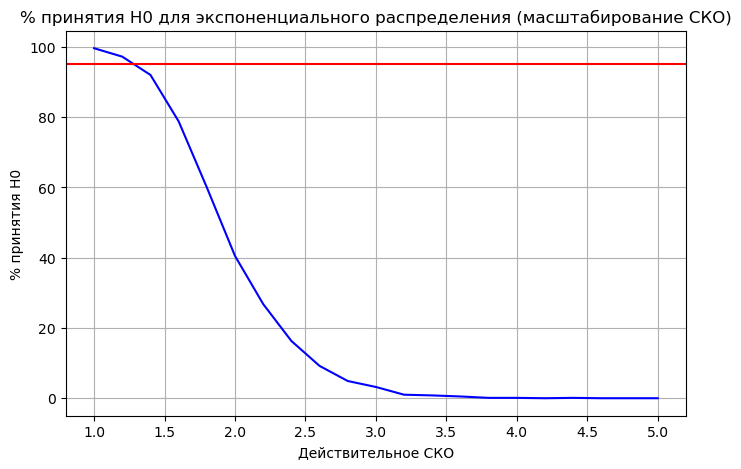

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint


def check_interval(x: np.ndarray, t: float = 5) -> int:
    """
    Проверяет, что хотя бы один 95%-интерквантильный промежуток укладывается в [-t, t].

    :param x: Выборка данных
    :param t: Параметр интервала [-t, t]
    :return: 1, если условие выполняется, иначе 0
    """
    n = len(x)
    count_inside = ((x < t) & (x > -t)).sum()
    p_min, _ = proportion_confint(count_inside, n, alpha=0.05)
    return int(p_min > 0.95)


def simulate_rates(sample_sizes: list, checker_function, t: float = 5) -> list:
    """
    Проводит моделирование для проверки гипотезы при разных размерах выборки.

    :param sample_sizes: Список размеров выборок
    :param checker_function: Функция-критерий для проверки гипотезы
    :param t: Параметр интервала [-t, t]
    :return: Список долей отклонений гипотезы H0
    """
    rates = [[], [], []]
    for n in sample_sizes:
        cur_rates = [0, 0, 0]
        for _ in range(1000):
            z = np.random.normal(0, 1, n)
            x = np.random.uniform(-np.sqrt(3), np.sqrt(3), n)
            c = np.random.exponential(1, n) - 1
            cur_rates[0] += checker_function(z, t)
            cur_rates[1] += checker_function(x, t)
            cur_rates[2] += checker_function(c, t)
        for i in range(3):
            rates[i].append(cur_rates[i] / 10)  # Делим на 10, чтобы получить %
    return rates


def simulate_scaled_variance(asize: list, n: int, checker_function, t: float = 5) -> list:
    """
    Проводит моделирование зависимости гипотезы от измененного среднего квадратического отклонения.

    :param asize: Список коэффициентов масштабирования для СКО
    :param n: Размер выборки
    :param checker_function: Функция-критерий для проверки гипотезы
    :param t: Параметр интервала [-t, t]
    :return: Список долей отклонений гипотезы H0
    """
    rates = [[], [], []]
    for scale in asize:
        cur_rates = [0, 0, 0]
        for _ in range(1000):
            z = np.random.normal(0, 1, n) * scale
            x = np.random.uniform(-np.sqrt(3), np.sqrt(3), n) * scale
            c = (np.random.exponential(1, n) - 1) * scale
            cur_rates[0] += checker_function(z, t)
            cur_rates[1] += checker_function(x, t)
            cur_rates[2] += checker_function(c, t)
        for i in range(3):
            rates[i].append(cur_rates[i] / 10)  # Делим на 10, чтобы получить %
    return rates


def plot_rates(x_values: list, rates: list, xlabel: str, title_suffix: str):
    """
    Строит графики долей принятия H0 для трех типов распределений.

    :param x_values: Значения по оси X (размеры выборок или масштабирование СКО)
    :param rates: Список долей принятия H0 для трех распределений
    :param xlabel: Подпись для оси X
    :param title_suffix: Суффикс для заголовка графиков
    """
    distribution_names = ["нормального", "равномерного", "экспоненциального"]
    for i in range(3):
        plt.figure(i + 1, figsize=(8, 5))
        plt.plot(x_values, rates[i], color='blue')
        plt.axhline(y=95, color='r', linestyle='-')
        plt.title(f"% принятия H0 для {distribution_names[i]} распределения ({title_suffix})")
        plt.xlabel(xlabel)
        plt.ylabel("% принятия H0")
        plt.grid()
        plt.show()


# Пункт 2: Проверка гипотезы при разных размерах выборки
def hypothesis_by_sample_size():
    """
    Проверка гипотезы о нахождении значений в интервале [-5, 5] для разных размеров выборки.
    """
    sample_sizes = [10, 50, 100, 150, 200, 500]
    rates = simulate_rates(sample_sizes, check_interval, t=5)
    plot_rates(sample_sizes, rates, xlabel="Размер выборки", title_suffix="размер выборки")


# Пункт 3: Проверка гипотезы при изменении СКО
def hypothesis_by_scaled_variance():
    """
    Проверка гипотезы о нахождении значений в интервале [-5, 5] при изменении СКО.
    """
    scale_factors = [1 + 0.2 * a for a in range(21)]  # Масштабирование от 1 до 5 с шагом 0.2
    rates = simulate_scaled_variance(scale_factors, n=100, checker_function=check_interval, t=5)
    plot_rates(scale_factors, rates, xlabel="Действительное СКО", title_suffix="масштабирование СКО")


# Запуск функций для пунктов 2 и 3
hypothesis_by_sample_size()
hypothesis_by_scaled_variance()
